[[-4.  -3.9 -3.8 ...  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...  3.8  3.9  4. ]
 ...
 [-4.  -3.9 -3.8 ...  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...  3.8  3.9  4. ]
 [-4.  -3.9 -3.8 ...  3.8  3.9  4. ]]
[[-4.  -4.  -4.  ... -4.  -4.  -4. ]
 [-3.9 -3.9 -3.9 ... -3.9 -3.9 -3.9]
 [-3.8 -3.8 -3.8 ... -3.8 -3.8 -3.8]
 ...
 [ 3.8  3.8  3.8 ...  3.8  3.8  3.8]
 [ 3.9  3.9  3.9 ...  3.9  3.9  3.9]
 [ 4.   4.   4.  ...  4.   4.   4. ]]
[[[-4.  -4. ]
  [-3.9 -4. ]
  [-3.8 -4. ]
  ...
  [ 3.8 -4. ]
  [ 3.9 -4. ]
  [ 4.  -4. ]]

 [[-4.  -3.9]
  [-3.9 -3.9]
  [-3.8 -3.9]
  ...
  [ 3.8 -3.9]
  [ 3.9 -3.9]
  [ 4.  -3.9]]

 [[-4.  -3.8]
  [-3.9 -3.8]
  [-3.8 -3.8]
  ...
  [ 3.8 -3.8]
  [ 3.9 -3.8]
  [ 4.  -3.8]]

 ...

 [[-4.   3.8]
  [-3.9  3.8]
  [-3.8  3.8]
  ...
  [ 3.8  3.8]
  [ 3.9  3.8]
  [ 4.   3.8]]

 [[-4.   3.9]
  [-3.9  3.9]
  [-3.8  3.9]
  ...
  [ 3.8  3.9]
  [ 3.9  3.9]
  [ 4.   3.9]]

 [[-4.   4. ]
  [-3.9  4. ]
  [-3.8  4. ]
  ...
  [ 3.8  4. ]
  [ 3.9  4. ]
  

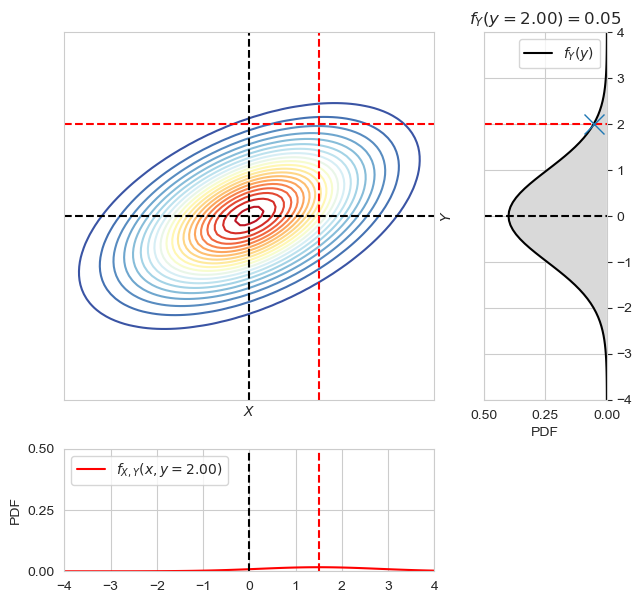

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # 构建子图
from matplotlib import cm  # Colormaps  # 颜色映射  
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
from scipy.stats import norm

rho = 0.5  # 相关性系数
sigma_X = 1.5
sigma_Y = 1

mu_X = 0
mu_Y = 0
# 平均值
mu = [mu_X, mu_Y]
# 协方差矩阵
Sigma = [[sigma_X ** 2, sigma_X * sigma_Y * rho],
         [sigma_X * sigma_Y * rho, sigma_Y ** 2]]

width = 4
# 生成数组
X = np.linspace(-width, width, 81)
Y = np.linspace(-width, width, 81)

XX, YY = np.meshgrid(X, Y)
print(XX)
print(YY)
# 沿第三个轴堆叠
XXYY = np.dstack((XX, YY))
print(XXYY)
# 创建多元正态分布对象
bi_norm = multivariate_normal(mu, Sigma)

y_cond_i = 60  # 20, 30, 40, 50, 60, index
# 计算 PDF 值
f_X_Y_joint = bi_norm.pdf(XXYY)

# Plot the tional distributions
fig = plt.figure(figsize=(7, 7))
# 划分子图
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[3, 1],
                       height_ratios=[3, 1])

# Plot surface on top left
ax1 = plt.subplot(gs[0])

# Plot bivariate normal
ax1.contour(XX, YY, f_X_Y_joint, 20, cmap=cm.RdYlBu_r)
ax1.axvline(x=mu_X, color='k', linestyle='--')
ax1.axhline(y=mu_Y, color='k', linestyle='--')
ax1.axhline(y=Y[y_cond_i], color='r', linestyle='--')
# 条件期望
x_sym_axis = mu_X + rho * sigma_X / sigma_Y * (Y[y_cond_i] - mu_Y)
ax1.axvline(x=x_sym_axis, color='r', linestyle='--')

ax1.set_xlabel('$X$')
ax1.set_ylabel('$Y$')
ax1.yaxis.set_label_position('right')
ax1.set_xticks([])
ax1.set_yticks([])

# Plot Y marginal
ax2 = plt.subplot(gs[1])
f_Y = norm.pdf(Y, loc=mu_Y, scale=sigma_Y)

ax2.plot(f_Y, Y, 'k', label='$f_{Y}(y)$')
ax2.axhline(y=mu_Y, color='k', linestyle='--')
ax2.axhline(y=Y[y_cond_i], color='r', linestyle='--')
ax2.plot(f_Y[y_cond_i], Y[y_cond_i], marker='x', markersize=15)
plt.title('$f_{Y}(y_{} = %.2f) = %.2f$'
          % (Y[y_cond_i], f_Y[y_cond_i]))

ax2.fill_between(f_Y, Y,
                 edgecolor='none',
                 facecolor='#D9D9D9')
ax2.legend(loc=0)
ax2.set_xlabel('PDF')
ax2.set_ylim(-width, width)
ax2.set_xlim(0, 0.5)
ax2.invert_xaxis()
ax2.yaxis.tick_right()

# Plot X and Y joint

ax3 = plt.subplot(gs[2])
f_X_Y_cond_i = f_X_Y_joint[y_cond_i, :]

ax3.plot(X, f_X_Y_cond_i, 'r',
         label='$f_{X,Y}(x,y_{} = %.2f)$' % (Y[y_cond_i]))

ax3.axvline(x=mu_X, color='k', linestyle='--')
ax3.axvline(x=x_sym_axis, color='r', linestyle='--')

ax3.legend(loc=0)
ax3.set_ylabel('PDF')
ax3.yaxis.set_label_position('left')
ax3.set_xlim(-width, width)
ax3.set_ylim(0, 0.5)
ax3.set_yticks([0, 0.25, 0.5])

ax4 = plt.subplot(gs[3])
ax4.set_visible(False)

plt.show()

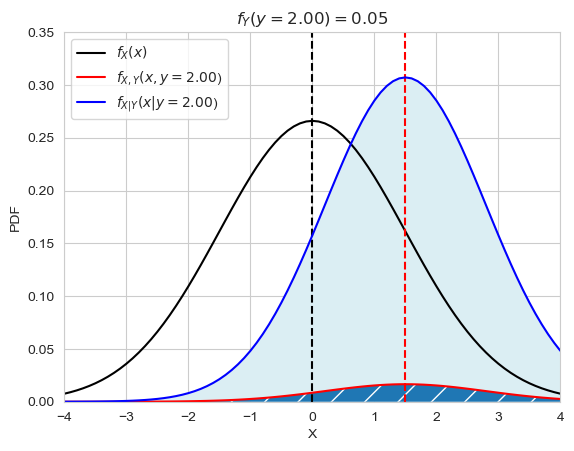

In [8]:
f_X = norm.pdf(X, loc=mu_X, scale=sigma_X)

fig, ax = plt.subplots()

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(Y)))

# 条件概率
f_X_given_Y_cond_i = f_X_Y_cond_i / f_Y[y_cond_i]

# 边缘分布
plt.plot(X, f_X, color='k',
         label='$f_{X}(x)$')  # marginal
ax.axvline(x=mu_X, color='k', linestyle='--')
# 联合分布
plt.plot(X, f_X_Y_cond_i, color='r',
         label='$f_{X,Y}(x,y_{} = %.2f$)' % (Y[y_cond_i]))  # joint
ax.axvline(x=x_sym_axis, color='r', linestyle='--')
# 条件分布
plt.plot(X, f_X_given_Y_cond_i, color='b',
         label='$f_{X|Y}(x|y_{} = %.2f$)' % (Y[y_cond_i]))  # tional

ax.fill_between(X, f_X_given_Y_cond_i,
                edgecolor='none',
                facecolor='#DBEEF3')

ax.fill_between(X, f_X_Y_cond_i,
                edgecolor='none',
                hatch='/')

plt.xlabel('X')
plt.ylabel('PDF')
ax.set_xlim(-width, width)
ax.set_ylim(0, 0.35)
plt.title('$f_{Y}(y_{} = %.2f) = %.2f$'
          % (Y[y_cond_i], f_Y[y_cond_i]))
ax.legend()

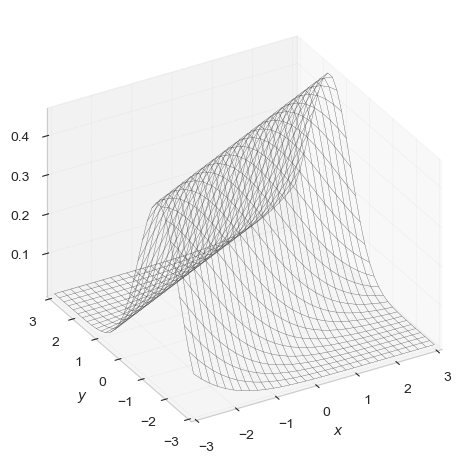

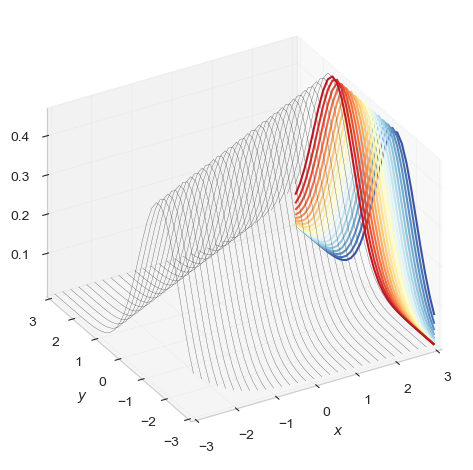

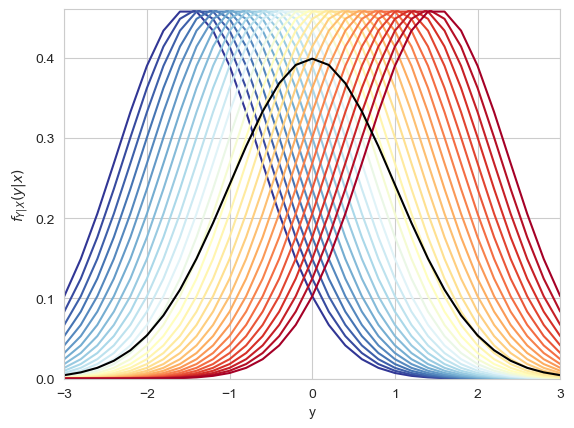

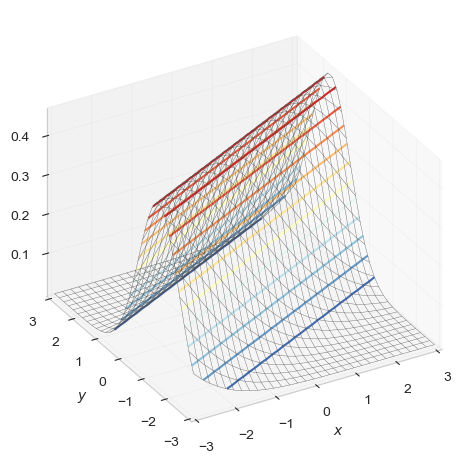

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm  # Colormaps 颜色映射
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
from scipy.stats import norm  # 正态分布
from mpl_toolkits.mplot3d import axes3d


def fcn_Y_given_X(mu_X, mu_Y, sigma_X, sigma_Y, rho, X, Y):
    '''条件概率密度值'''
    
    coeff = 1 / sigma_Y / np.sqrt(1 - rho ** 2) / np.sqrt(2 * np.pi)
    sym_axis = mu_Y + rho * sigma_Y / sigma_X * (X - mu_X)

    quad = -1 / 2 * ((Y - sym_axis) / sigma_Y / np.sqrt(1 - rho ** 2)) ** 2

    f_Y_given_X = coeff * np.exp(quad)

    return f_Y_given_X


# parameters 参数
rho = 0.5  
sigma_X = 1
sigma_Y = 1

mu_X = 0
mu_Y = 0

width = 3

X = np.linspace(-width, width, 31)
Y = np.linspace(-width, width, 31)

XX, YY = np.meshgrid(X, Y)

# 计算概率密度值
f_Y_given_X = fcn_Y_given_X(mu_X, mu_Y, sigma_X, sigma_Y, rho, XX, YY)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(XX, YY, f_Y_given_X,
                  color=[0.3, 0.3, 0.3],
                  linewidth=0.25)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f_{Y|X}(y|x)$')
ax.set_proj_type('ortho')
ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

ax.set_xlim(-width, width)
ax.set_ylim(-width, width)
ax.set_zlim(f_Y_given_X.min(), f_Y_given_X.max())
plt.tight_layout()
ax.view_init(azim=-120, elev=30)
plt.show()

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(XX, YY, f_Y_given_X, rstride=0, cstride=1,
                  color=[0.3, 0.3, 0.3],
                  linewidth=0.25)

ax.contour(XX, YY, f_Y_given_X,
           levels=20, zdir='x', \
           offset=YY.max(), cmap=cm.RdYlBu_r)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f_{Y|X}(y|x)$')
ax.set_proj_type('ortho')
ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

ax.set_xlim(-width, width)
ax.set_ylim(-width, width)
ax.set_zlim(f_Y_given_X.min(), f_Y_given_X.max())
plt.tight_layout()
ax.view_init(azim=-120, elev=30)
plt.show()

# add X marginal

# 计算 Y 的概率密度值
f_Y = norm.pdf(Y, loc=mu_Y, scale=sigma_Y)

fig, ax = plt.subplots()

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(X)))

for i in np.linspace(1, len(X), len(X)):
    plt.plot(Y, f_Y_given_X[:, int(i) - 1],
             color=colors[int(i) - 1])

plt.plot(Y, f_Y, color='k')

plt.xlabel('y')
plt.ylabel('$f_{Y|X}(y|x)$')
ax.set_xlim(-width, width)
ax.set_ylim(0, f_Y_given_X.max())

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(XX, YY, f_Y_given_X,
                  color=[0.3, 0.3, 0.3],
                  linewidth=0.25)

ax.contour3D(XX, YY, f_Y_given_X, 12,
             cmap='RdYlBu_r')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f_{Y|X}(y|x)$')
ax.set_proj_type('ortho')
ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

ax.set_xlim(-width, width)
ax.set_ylim(-width, width)
ax.set_zlim(f_Y_given_X.min(), f_Y_given_X.max())
plt.tight_layout()
ax.view_init(azim=-120, elev=30)
plt.show()

Text(0, 0.5, '$y$')

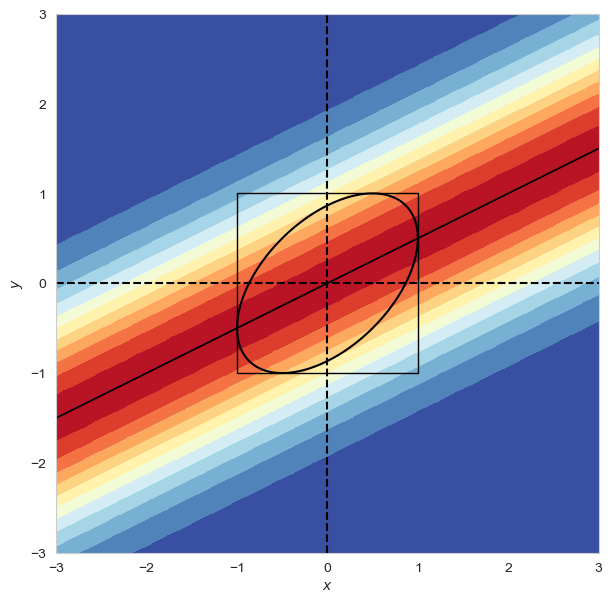

In [12]:
# Plot filled contours

# 期望
E_Y_given_X = mu_Y + rho * sigma_Y / sigma_X * (X - mu_X)

from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(7, 7))

# Plot bivariate normal
plt.contourf(XX, YY, f_Y_given_X, 12, cmap=cm.RdYlBu_r)
plt.plot(X, E_Y_given_X, color='k', linewidth=1.25)

plt.axvline(x=mu_X, color='k', linestyle='--')
plt.axhline(y=mu_Y, color='k', linestyle='--')

x = np.linspace(-width, width, num=201)
y = np.linspace(-width, width, num=201)

xx, yy = np.meshgrid(x, y);

# 椭圆
ellipse = ((xx / sigma_X) ** 2 -
           2 * rho * (xx / sigma_X) * (yy / sigma_Y) +
           (yy / sigma_Y) ** 2) / (1 - rho ** 2);

plt.contour(xx, yy, ellipse, levels=[1], colors='k')

rect = Rectangle(xy=[- sigma_X, - sigma_Y],
                 width=2 * sigma_X,
                 height=2 * sigma_Y,
                 edgecolor='k', facecolor="none")

ax.add_patch(rect)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

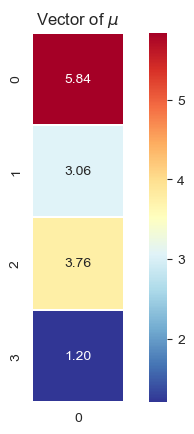

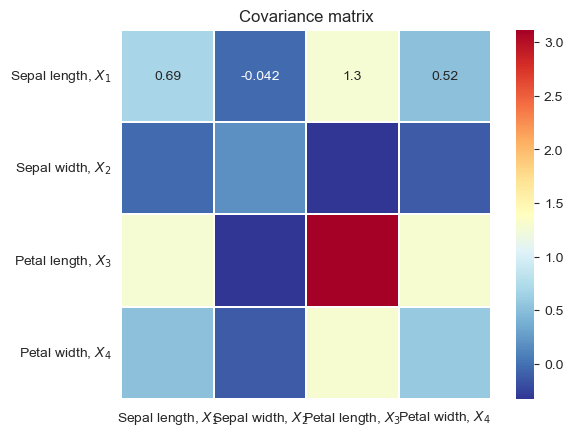

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from scipy.stats import norm
import scipy
import seaborn as sns
from numpy.linalg import inv

iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

x_array = np.linspace(0, 8, 100)
# Convert X array to dataframe
X_Y_df = pd.DataFrame(X, columns=feature_names)

MU = X_Y_df.mean()
MU = np.array([MU]).T

fig, axs = plt.subplots()

h = sns.heatmap(MU, cmap='RdYlBu_r',
                linewidths=.05, annot=True, fmt='.2f')

h.set_aspect("equal")
h.set_title('Vector of $\mu$')

# 协方差矩阵
SIGMA = X_Y_df.cov()

fig, axs = plt.subplots()

h = sns.heatmap(SIGMA, cmap='RdYlBu_r', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('Covariance matrix')

SIGMA = np.array(SIGMA)

In [15]:
from sympy import symbols

x1, x2, x3 = symbols('x1 x2 x3')

SIGMA_XX = SIGMA[0:3, 0:3]

SIGMA_YX = SIGMA[3, 0:3]
SIGMA_YX = np.matrix(SIGMA_YX)

MU_Y = MU[3]
MU_Y = np.matrix(MU_Y)

MU_X = MU[0:3]

x_vec = np.array([[x1, x2, x3]]).T

y = SIGMA_YX @ inv(SIGMA_XX) @ (x_vec - MU_X) + MU_Y

print(y)

[[-0.207266073757426*x1 + 0.22282854386093*x2 + 0.52408311477843*x3 - 0.240307389112266]]


Text(0.5, 1.0, '$\\Sigma^{-1}_{XX}$')

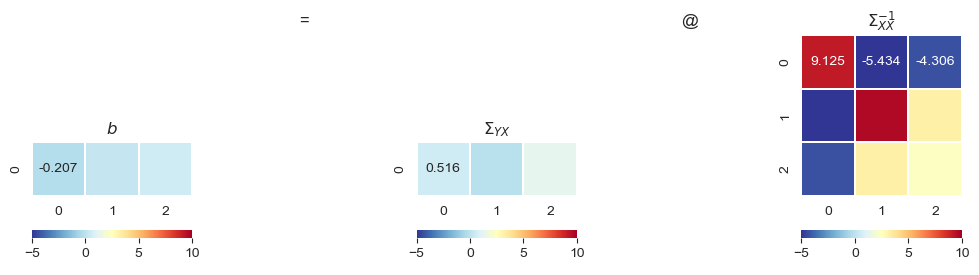

In [16]:
b = SIGMA_YX @ inv(SIGMA_XX)  # coefficients
b0 = MU_Y - b @ MU_X  # constant

# computate coefficient vector

fig, axs = plt.subplots(1, 5, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(b, cmap='RdYlBu_r',
                 linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=10, vmin=-5)

ax.set_aspect("equal")
plt.title('$b$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(SIGMA_YX, cmap='RdYlBu_r', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=10, vmin=-5)
ax.set_aspect("equal")
plt.title('$\Sigma_{YX}$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(inv(SIGMA_XX), cmap='RdYlBu_r', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=10, vmin=-5)
ax.set_aspect("equal")
plt.title('$\Sigma^{-1}_{XX}$')


Text(0.5, 1.0, '$\\mu_X$')

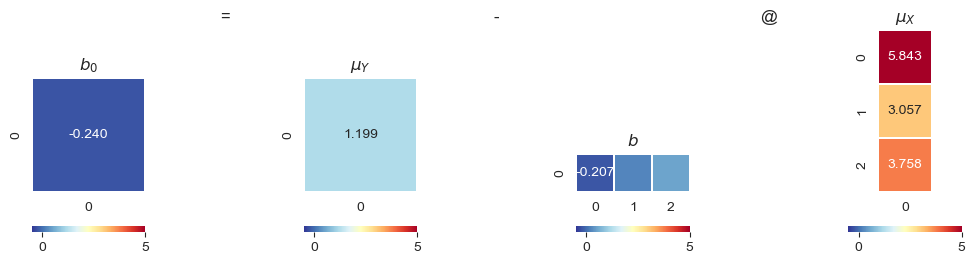

In [19]:
# compute constant b0

fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(b0, cmap='RdYlBu_r',
                 linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=5, vmin=-0.5)

ax.set_aspect("equal")
plt.title('$b_0$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(MU_Y, cmap='RdYlBu_r', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=5, vmin=-0.5)
ax.set_aspect("equal")
plt.title('$\mu_Y$')

plt.sca(axs[3])
plt.title('-')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(b, cmap='RdYlBu_r', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=5, vmin=-0.5)
ax.set_aspect("equal")
plt.title('$b$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(MU_X, cmap='RdYlBu_r', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.3f',
                 vmax=5, vmin=-0.5)
ax.set_aspect("equal")
plt.title('$\mu_X$')


In [18]:
import statsmodels.api as sm

X_df = X_Y_df[feature_names[0:3]]
y_df = X_Y_df[feature_names[3]]

# add a column of ones
# 添加常数项 
# sm.add_constant(X_df)函数会在 X_df DataFrame 中添加一个全为1的列
X_df = sm.add_constant(X_df)

# 创建一个最小二乘法回归模型
model = sm.OLS(y_df, X_df)
# 拟合
results = model.fit()
# 拟合结果摘要
print(results.summary())
# 参数
p = model.fit().params
print(p)

                            OLS Regression Results                            
Dep. Variable:     Petal width, $X_4$   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           7.83e-88
Time:                        13:36:10   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2403    